# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from numpy import array
from numpy.linalg import inv
from matplotlib import pyplot as plt
from scipy import stats


# A. Solve using Analytical Calculus - Random data points

## Create random X and y samples

In [2]:
# Generate 'random' data
#np.random.seed(1)

# Number of Samples
n = 100

# Create r and r1, random vectors of 100 numbers each with mean = 0 and standard deviation = 1
r = np.random.randn(n)
r1 = np.random.randn(n)

# Create random Input vector X using r
# mean = 3
# stddev = 2
X = 3 * r + 2

# Create random Residual term Res using r
# mean = 0
# stddev = 0.5
res = 0.8 * r1 

# Generate Y values based on the simulated regression line and error/noise
# Population Regression Line
yreg = 2.5 + 0.35 * X 
# Adding noise/error
y = yreg + res                  

# Storing Population Regression Line "RegL", data points X and y in a data frame
rl = pd.DataFrame(
    {'X': X,
     'y': y,
     'RegL':yreg}
)

# Show the first five rows of our dataframe
rl.head()

,X,y,RegL
0,5.170344,2.740121,4.309621
1,-1.465170,3.527307,1.987190
2,-0.903630,3.290195,2.183729
3,0.089468,2.265566,2.531314
4,0.704372,3.641357,2.746530


## Calculate coefficients alpha and beta

In [3]:
# Assuming y = aX + b
# a ~ alpha
# b ~ beta

# Calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of alpha
rl['CovXY'] = (rl['X'] - xmean) * (rl['y'] - ymean)
rl['VarX'] = (rl['X'] - xmean)**2

# Calculate alpha
# Numerator: Covariance between X and y
# Denominator: Variance of X
alpha = rl['CovXY'].sum() / rl['VarX'].sum()

# Calculate beta
beta = ymean - (alpha * xmean)
print('alpha =', alpha)
print('beta =',beta)

alpha = 0.32950059000352416
beta = 2.5414860604446927


## Prediction - Least Squares Line

In [4]:
ypred = alpha * X + beta

## Calculate Model Metrics - RSS, RSE(σ), TSS and R^2 Statistic

In [5]:
# Residual Errors
RE = (rl['y'] - ypred)**2
#Residual Sum Squares
RSS = RE.sum()
print("Residual Sum of Squares (RSS) is:",RSS)

# Estimated Standard Variation (sigma) or RSE
RSE = np.sqrt(RSS/(n-2))
print("\nResidual Standar Error (Standard Deviation σ) is:",RSE)

# Total Sum of squares (TSS)
TE = (rl['y'] - ymean)**2
# Total Sum Squares
TSS = TE.sum()
print("\nTotal Sum of Squares (TSS) is:",TSS)

# R^2 Statistic
R2 = 1 - RSS/TSS
print("\n R2 Statistic is:",R2)

Residual Sum of Squares (RSS) is: 75.2666900833984

Residual Standar Error (Standard Deviation σ) is: 0.8763717532135525

Total Sum of Squares (TSS) is: 161.12495310258166

 R2 Statistic is: 0.5328675749219354


## Assessing Coefficients accuracy

In [6]:
# Degrees of freedom
df = 2*n - 2

# Standard error, t-Statistic and  p-value for Slope "alpha" coefficient
SE_alpha = np.sqrt(RSE**2/rl['VarX'].sum())
t_alpha = alpha/SE_alpha
p_alpha = 1 - stats.t.cdf(t_alpha,df=df)

# Standard error, t-Statistic and  p-value for Intercept "beta" coefficient
SE_beta = np.sqrt(RSE*(1/n + xmean**2/(rl['VarX'].sum())))
t_beta = beta/SE_beta 
p_beta = 1 - stats.t.cdf(t_beta,df=df)

## Coefficients Assessment Summary

In [7]:
# Assessment of Coefficients
mds = pd.DataFrame(
    {'Name':['Slope (alpha)', 'Intercept (beta)'],
     'Coefficient': [alpha, beta],
     'RSE':[SE_alpha, SE_beta],
     't-Statistic':[t_alpha, t_beta],
     'p-Value':[p_alpha, p_beta]
    }
)
mds

,Name,Coefficient,RSE,t-Statistic,p-Value
0,Slope (alpha),0.329501,0.031164,10.573108,0.0
1,Intercept (beta),2.541486,0.110231,23.056100,0.0


## Model Assessment Summary

In [8]:
# Model Assessment - Storing all key indicators in dummy data frame with range 1
ms = pd.DataFrame(
    {'Ref': range(0,1),
     'Residual Sum of Squares (RSS)': RSS,
     'RSE (Standard Deviation σ)': RSE,
     'Total Sum of Squares (TSS)': TSS,
     'R2 Statistic': R2
     }
)

# Cut out the dummy index column to see the Results
ms.iloc[:,1:9]    

,Residual Sum of Squares (RSS),RSE (Standard Deviation σ),Total Sum of Squares (TSS),R2 Statistic
0,75.26669,0.876372,161.124953,0.532868


## Plot Predicted vs Actual vs Sampled Data

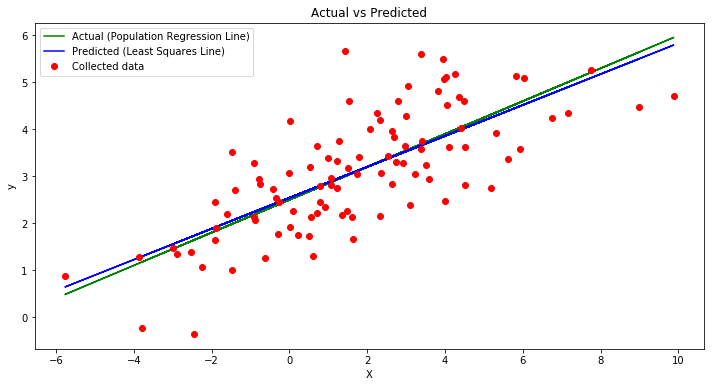

In [9]:

# Plot regression against actual data
plt.figure(figsize=(12, 6))
# Population Regression Line
plt.plot(X,rl['RegL'], label = 'Actual (Population Regression Line)',color='green')
# Least squares line
plt.plot(X, ypred, label = 'Predicted (Least Squares Line)', color='blue')     
# scatter plot showing actual data
plt.plot(X, y, 'ro', label ='Collected data')   
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# B. Solve using Matrix Algebra - Fixed data points

## Create and Format Data

In [10]:
X1 = np.matrix([np.ones(n), rl['X']]).T
y1 = np.matrix(rl['y']).T

## Solve for projection matrix

In [11]:
A = np.linalg.inv(X1.T.dot(X1)).dot(X1.T).dot(y1)

m = np.asscalar(A[1])
b = np.asscalar(A[0])

print("b (bias/Y intercept) =",b,", and m (slope) =",m)

b (bias/Y intercept) = 2.5414860604446923 , and m (slope) = 0.32950059000352405


## Plot data and predictions

In [12]:
#xx = np.linspace(0, .5, 2)
y1pred = b + m * X

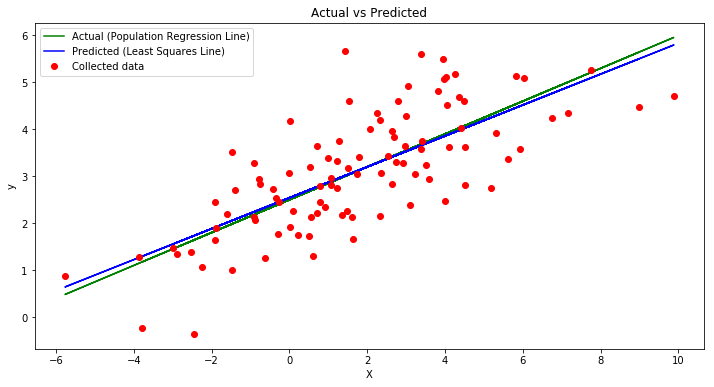

In [18]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
# Population Regression Line
plt.plot(X,rl['RegL'], label = 'Actual (Population Regression Line)',color='green')
# Least squares line
plt.plot(X, y1pred, label = 'Predicted (Least Squares Line)', color='blue')     
# scatter plot showing actual data
plt.plot(X, y, 'ro', label ='Collected data')   
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


#plt.figure(1)
#plt.scatter(input[:,0], input[:,1], color='r')
#plt.plot(xx, yy.T, color='b')
#plt.show()